# **MOVIE RATING PREDICTION**


# **Import library**

In [161]:
import pandas as pd
import numpy as np

In [162]:
import chardet
with open('/content/drive/MyDrive/Movie dataset.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
df = pd.read_csv('/content/drive/MyDrive/Movie dataset.csv', encoding=encoding)

In [163]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [165]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [166]:
#Missing values in the data
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [167]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [168]:
df['Duration'].head()

0        NaN
1    109 min
2     90 min
3    110 min
4    105 min
Name: Duration, dtype: object

In [169]:
df['Year'] = df['Year'].str.extract('(\d+)')
df['Year'] = pd.to_numeric(df['Year'])

In [170]:
df.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [171]:
df['Duration'] = df['Duration'].str.extract('(\d+)')

In [172]:
df['Duration'] = pd.to_numeric(df['Duration'])

In [173]:
median = df['Duration'].median()

In [174]:
df['Duration'] = df['Duration'].fillna(median)

In [175]:
mean = df['Rating'].mean()

In [176]:
df['Rating'] = df['Rating'].fillna(mean)

In [177]:
df.isnull().sum()

Name           0
Year         528
Duration       0
Genre       1877
Rating         0
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [178]:
df.dropna(inplace=True)

In [179]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [180]:
df.shape

(7559, 10)

In [181]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [182]:
genre_counts = {}
for genres in df['Genre']:
    if pd.notna(genres):  # Checking if genre entry is not NaN
        individual_genres = [genre.strip() for genre in genres.split(',')]
        for genre in individual_genres:
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1

# Print genre counts
for genre, count in sorted(genre_counts.items()):
    print(f'{genre}: {count}')

Action: 2320
Adventure: 374
Animation: 45
Biography: 128
Comedy: 1596
Crime: 1107
Documentary: 49
Drama: 4854
Family: 651
Fantasy: 202
History: 120
Horror: 273
Music: 57
Musical: 492
Mystery: 366
News: 1
Romance: 1767
Sci-Fi: 34
Sport: 47
Thriller: 863
War: 33
Western: 2


In [183]:
pd.concat([df['Actor 1'],df['Actor 2'], df['Actor 3']]).value_counts()

Mithun Chakraborty    231
Dharmendra            217
Jeetendra             179
Ashok Kumar           173
Amitabh Bachchan      162
                     ... 
Sanket Dhawan           1
Salim Aziz Durrani      1
Nishant Lal             1
Richa Dixit             1
Shatakshi Gupta         1
Name: count, Length: 5960, dtype: int64

# **Data** **Visualization**

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [185]:
df['Year'].value_counts()

Year
2019.0    238
2017.0    223
2018.0    214
2015.0    188
2016.0    184
         ... 
1939.0      4
1931.0      3
1932.0      2
1934.0      2
1917.0      1
Name: count, Length: 92, dtype: int64

Text(0.5, 1.0, 'Annual movie Release count')

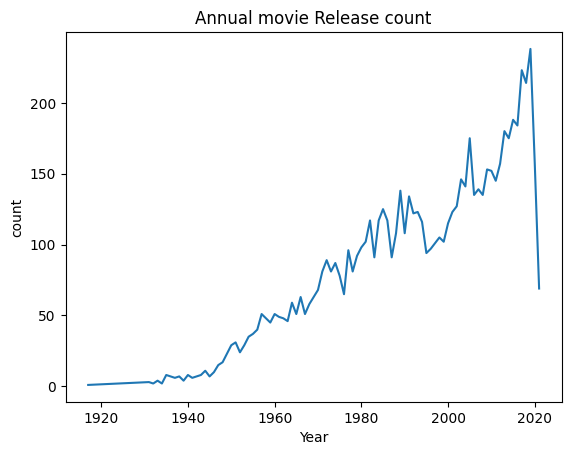

In [186]:
sns.lineplot(data=df['Year'].value_counts()).set_title('Annual movie Release count')

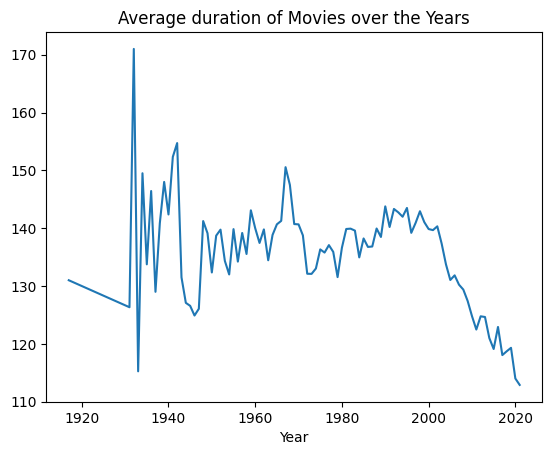

In [187]:
df.groupby('Year')['Duration'].mean().plot()
plt.title('Average duration of Movies over the Years')
plt.show()

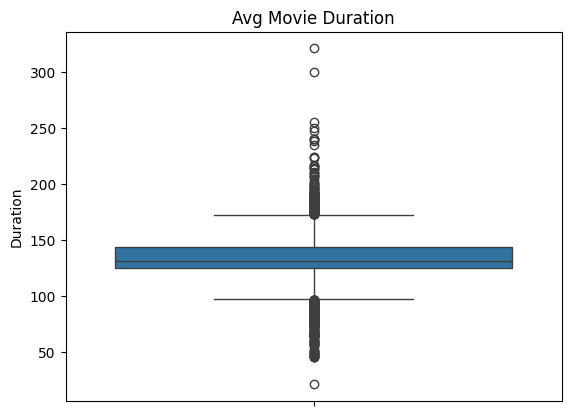

In [188]:
sns.boxplot(data=df, y='Duration')
plt.title('Avg Movie Duration')
plt.show()

In [189]:
#Removing Outliers
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
df = df[(df['Duration'] >= lb) & (df['Duration'] <= ub)]
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992.0,131.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [190]:
genres = df['Genre'].str.split(', ', expand=True).stack().value_counts()

In [191]:
genres.values

array([4365, 2162, 1633, 1460, 1022,  800,  601,  434,  336,  330,  234,
        181,  113,   97,   50,   40,   29,   26,   24,   19,    2])

In [192]:
genres.keys()

Index(['Drama', 'Action', 'Romance', 'Comedy', 'Crime', 'Thriller', 'Family',
       'Musical', 'Adventure', 'Mystery', 'Horror', 'Fantasy', 'Biography',
       'History', 'Music', 'Sport', 'Sci-Fi', 'War', 'Animation',
       'Documentary', 'Western'],
      dtype='object')

<ipython-input-193-37d315380918>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(x=genres.keys(),y=genres.values).set_xticklabels(labels=genres.keys(), rotation = 90)


Text(0.5, 0, 'Genre')

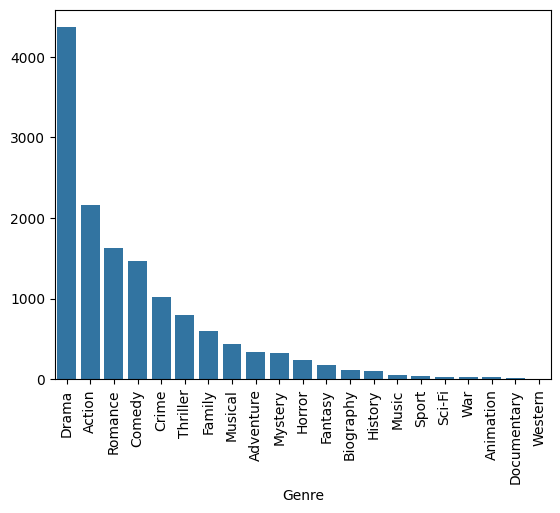

In [193]:
sns.barplot(x=genres.keys(),y=genres.values).set_xticklabels(labels=genres.keys(), rotation = 90)
plt.xlabel('Genre')

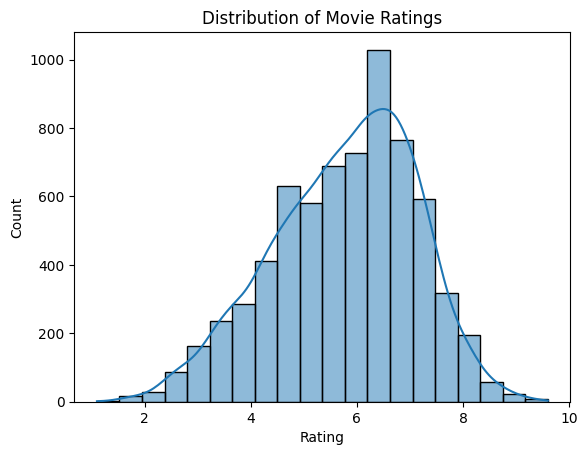

In [194]:
sns.histplot(data = df, x = "Rating", bins = 20, kde = True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

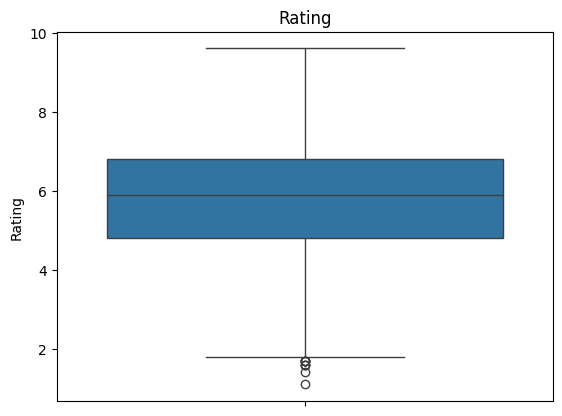

In [195]:
sns.boxplot(data=df, y='Rating')
plt.title('Rating')
plt.show()

In [196]:
q1 = df['Rating'].quantile(0.25)
q3 = df['Rating'].quantile(0.75)
iqr = q3 - q1
lb1 = q1 - 1.5 * iqr
ub1 = Q3 + 1.5 * iqr
df = df[(df['Rating'] >= lb1) & (df['Rating'] <= ub1)]
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992.0,131.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


<ipython-input-197-eb3e95a99274>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Director'].value_counts().head().keys(),y=df['Director'].value_counts().head().values, palette='viridis').set_xticklabels(labels=genres.keys(), rotation = 90)
<ipython-input-197-eb3e95a99274>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(x=df['Director'].value_counts().head().keys(),y=df['Director'].value_counts().head().values, palette='viridis').set_xticklabels(labels=genres.keys(), rotation = 90)


[Text(0, 0, 'Drama'),
 Text(1, 0, 'Action'),
 Text(2, 0, 'Romance'),
 Text(3, 0, 'Comedy'),
 Text(4, 0, 'Crime')]

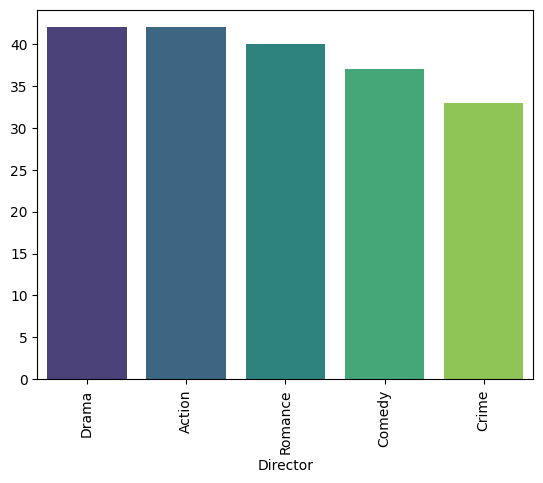

In [197]:
sns.barplot(x=df['Director'].value_counts().head().keys(),y=df['Director'].value_counts().head().values, palette='viridis').set_xticklabels(labels=genres.keys(), rotation = 90)

#**Data Cleaning**

In [198]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df

<ipython-input-198-6e772b5429b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor"
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon"
...,...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992.0,131.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,"Dharmendra, Moushumi Chatterjee, Govinda"
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,"Chiranjeevi, Jayamalini, Rajinikanth"
15504,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,"Naseeruddin Shah, Sumeet Saigal, Suparna Anand"
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [199]:
df.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)

<ipython-input-199-08b7deba1b4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)


In [200]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,"Augustine, Fathima Babu, Byon"
...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992.0,131.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,"Dharmendra, Moushumi Chatterjee, Govinda"
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,"Chiranjeevi, Jayamalini, Rajinikanth"
15504,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.6,11,Mahendra Shah,"Naseeruddin Shah, Sumeet Saigal, Suparna Anand"
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [201]:
df['Votes']

1            8
3           35
5          827
6        1,086
9           11
         ...  
15501      135
15503       44
15504       11
15505      655
15508       20
Name: Votes, Length: 6831, dtype: object

In [202]:
df.columns = df.columns.str.strip().str.replace('[^a-zA-Z0-9 ]', '')
def convert_votes(votes_str):
    if ',' in votes_str:
        votes_str = votes_str.replace(',', '')
    if 'M' in votes_str:
        return float(votes_str.replace('$', '').replace('M', '')) * 1e6  # Converting to millions
    else:
        return float(votes_str)
df['Votes'] = df['Votes'].apply(convert_votes)

<ipython-input-202-fb88dca1c1e4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes'] = df['Votes'].apply(convert_votes)


In [203]:
df['Votes']

1           8.0
3          35.0
5         827.0
6        1086.0
9          11.0
          ...  
15501     135.0
15503      44.0
15504      11.0
15505     655.0
15508      20.0
Name: Votes, Length: 6831, dtype: float64

In [204]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(', '))
df['Director'] = df['Director'].apply(lambda x: x.strip())
df['Actor'] = df['Actor'].apply(lambda x: x.split(', '))

<ipython-input-204-9491432be903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = df['Genre'].apply(lambda x: x.split(', '))
<ipython-input-204-9491432be903>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director'] = df['Director'].apply(lambda x: x.strip())
<ipython-input-204-9491432be903>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [205]:
df['Genre']

1                          [Drama]
3                [Comedy, Romance]
5         [Comedy, Drama, Musical]
6            [Drama, Romance, War]
9        [Action, Crime, Thriller]
                   ...            
15501       [Action, Crime, Drama]
15503       [Action, Crime, Drama]
15504                     [Action]
15505              [Action, Drama]
15508              [Action, Drama]
Name: Genre, Length: 6831, dtype: object

In [206]:
data_expanded = df.explode('Genre').explode('Actor')

In [207]:
data_expanded

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Vivek Ghamande
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Arvind Jangid
3,#Yaaram,2019.0,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik
3,#Yaaram,2019.0,110.0,Comedy,4.4,35.0,Ovais Khan,Ishita Raj
...,...,...,...,...,...,...,...,...
15508,Zulm-O-Sitam,1998.0,130.0,Action,6.2,20.0,K.C. Bokadia,Jaya Prada
15508,Zulm-O-Sitam,1998.0,130.0,Action,6.2,20.0,K.C. Bokadia,Arjun Sarja
15508,Zulm-O-Sitam,1998.0,130.0,Drama,6.2,20.0,K.C. Bokadia,Dharmendra
15508,Zulm-O-Sitam,1998.0,130.0,Drama,6.2,20.0,K.C. Bokadia,Jaya Prada


In [208]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(data_expanded['Genre']), columns=mlb.classes_, index=data_expanded.index)
director_encoded = pd.get_dummies(data_expanded['Director'], prefix='Director')
actor_encoded = pd.DataFrame(mlb.fit_transform(data_expanded['Actor']), columns=mlb.classes_, index=data_expanded.index)
input_features = pd.concat([data_expanded[['Year', 'Duration', 'Votes']], genre_encoded, director_encoded, actor_encoded], axis=1)
target = data_expanded['Rating']

In [209]:
input_features

,Year,Duration,Votes,-,A,B,C,D,F,H,...,x,y,z,á,è,é,í,ï,ó,ö
1,2019.0,109.0,8.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019.0,109.0,8.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019.0,109.0,8.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019.0,110.0,35.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019.0,110.0,35.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,1998.0,130.0,20.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15508,1998.0,130.0,20.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15508,1998.0,130.0,20.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15508,1998.0,130.0,20.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


# **The Model**

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_models(models, features, target, test_size=0.25, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=test_size, random_state=random_state)

    results = []

    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({'Model': model_name, 'MSE': mse, 'R2_Score': r2})

    return results

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('KNN', KNeighborsRegressor()),
]

result = evaluate_models(models, input_features, target)
results_df = pd.DataFrame(result)
results_df_sorted = results_df.sort_values(by='R2_Score', ascending=False)
pd.DataFrame(results_df_sorted)

,Model,MSE,R2_Score
3,Random Forest,0.170428,0.903713
2,Decision Tree,0.229040,0.870599
4,KNN,0.302111,0.829316
0,Linear Regression,0.673764,0.619342
1,Ridge Regression,0.729871,0.587643
